In [1]:
html = (
    '<!DOCTYPE html>\n'
    '<html lang="en">\n'
    '<head>\n'
)

html

'<!DOCTYPE html>\n<html lang="en">\n<head>\n'

In [2]:
import numpy as np

In [5]:
np.random.dirichlet(np.ones(2), 10)

array([[0.98603679, 0.01396321],
       [0.43940082, 0.56059918],
       [0.97647707, 0.02352293],
       [0.80332019, 0.19667981],
       [0.99539816, 0.00460184],
       [0.57062203, 0.42937797],
       [0.45849765, 0.54150235],
       [0.54829519, 0.45170481],
       [0.20800004, 0.79199996],
       [0.51805914, 0.48194086]])

In [1]:
if []:
    print('This will not be printed')

In [1]:
import numpy as np

def generate_uniform_hypersphere_points(d, n):
    """
    Generate n points evenly distributed within a d-dimensional unit hypersphere
    
    Parameters:
    -----------
    d : int
        Number of dimensions
    n : int
        Number of points to generate
    
    Returns:
    --------
    points : ndarray
        Array of shape (n, d) containing the generated points
    """
    # Method 1: Use normalized Gaussian vectors with appropriate radius scaling
    
    # Step 1: Generate random points from a d-dimensional normal distribution
    # This gives uniform distribution on the hypersphere surface
    points = np.random.normal(size=(n, d))
    
    # Step 2: Normalize each point to get it on the unit hypersphere surface
    norms = np.linalg.norm(points, axis=1, keepdims=True)
    points = points / norms
    
    # Step 3: Generate random radii that follow r^(d-1) distribution
    # This ensures uniform volume distribution within the hypersphere
    radii = np.random.random(n) ** (1.0/d)
    
    # Step 4: Scale each point by its radius
    points = points * radii.reshape(-1, 1)
    
    return points

# Alternative implementation using low-discrepancy sequences for better evenness
def generate_quasirandom_hypersphere_points(d, n):
    """
    Generate n points evenly distributed within a d-dimensional unit hypersphere
    using Sobol sequence for better spatial distribution
    
    Requires scipy for Sobol sequence generation
    """
    from scipy.stats import qmc
    
    # Create a Sobol sequence sampler
    sampler = qmc.Sobol(d=d, scramble=True)
    
    # Sample n points from the unit hypercube [0, 1)^d
    cube_points = sampler.random(n)
    
    # Convert to spherical coordinates
    
    # Step 1: Get radius component (r^(1/d) distribution for volume uniformity)
    radii = cube_points[:, 0] ** (1.0/d)
    
    # Step 2: Generate random directions using remaining dimensions
    # Map to normal distribution and normalize
    normal_points = qmc.normal(cube_points[:, 1:], loc=0, scale=1)
    
    # Normalize to get unit vectors
    norms = np.linalg.norm(normal_points, axis=1, keepdims=True)
    unit_vectors = normal_points / norms
    
    # Scale unit vectors by appropriate radii
    points = unit_vectors * radii.reshape(-1, 1)
    
    return points

# Example of how to visualize in 3D to check distribution:
def plot_3d_distribution(points):
    """
    Visualize points in 3D to check the distribution within a unit sphere
    """
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], alpha=0.6, s=20)
    
    # Add wireframe for the unit sphere
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = np.cos(u) * np.sin(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(v)
    ax.plot_wireframe(x, y, z, color='gray', alpha=0.2)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Points in Unit Sphere')
    plt.tight_layout()
    
    return fig, ax

(<Figure size 1000x1000 with 1 Axes>,
 <Axes3DSubplot:title={'center':'3D Points in Unit Sphere'}, xlabel='X', ylabel='Y'>)

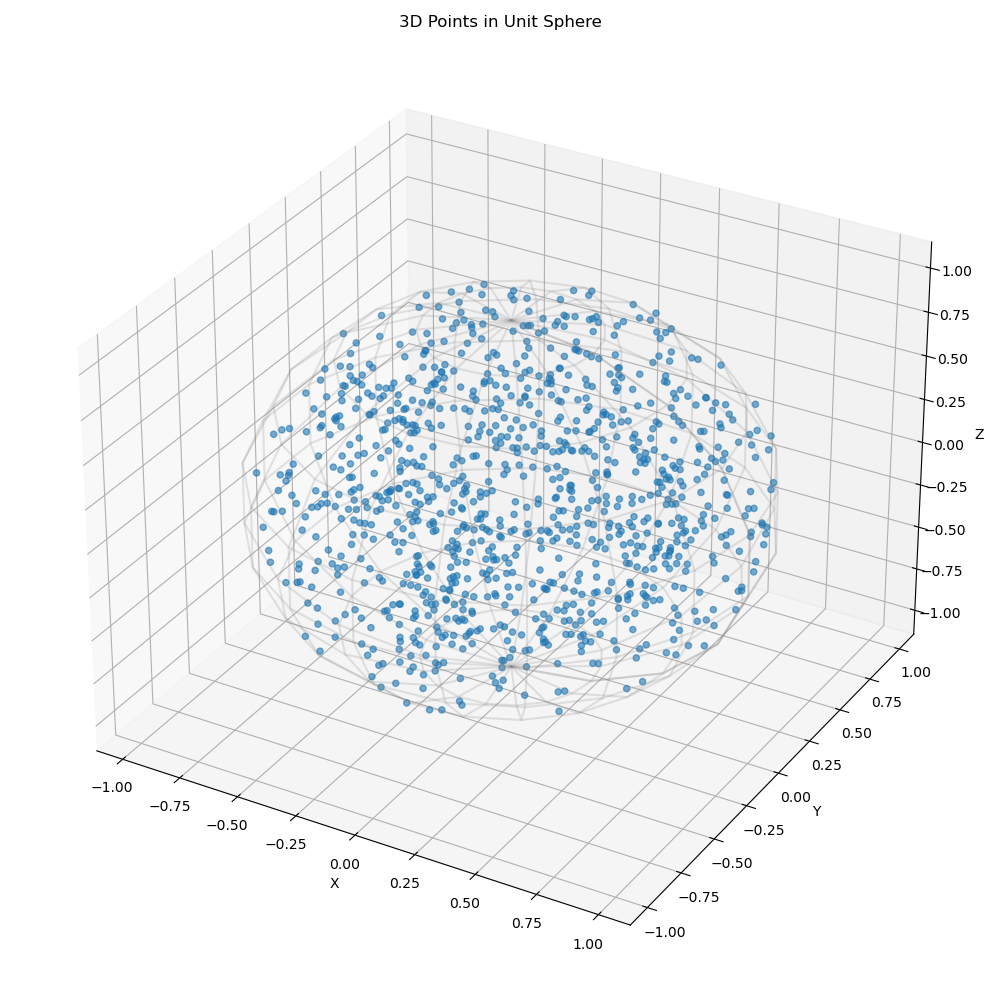

In [3]:
%matplotlib widget
plot_3d_distribution(generate_uniform_hypersphere_points(3, 1000))

In [4]:
import numpy as np

def generate_uniform_hypersphere_points(d, n):
    """
    Generate n points evenly distributed within a d-dimensional unit hypersphere
    
    Parameters:
    -----------
    d : int
        Number of dimensions
    n : int
        Number of points to generate
    
    Returns:
    --------
    points : ndarray
        Array of shape (n, d) containing the generated points
    """
    # Method 1: Use normalized Gaussian vectors with appropriate radius scaling
    
    # Step 1: Generate random points from a d-dimensional normal distribution
    # This gives uniform distribution on the hypersphere surface
    points = np.random.normal(size=(n, d))
    
    # Step 2: Normalize each point to get it on the unit hypersphere surface
    norms = np.linalg.norm(points, axis=1, keepdims=True)
    points = points / norms
    
    # Step 3: Generate random radii that follow r^(d-1) distribution
    # This ensures uniform volume distribution within the hypersphere
    radii = np.random.random(n) ** (1.0/d)
    
    # Step 4: Scale each point by its radius
    points = points * radii.reshape(-1, 1)
    
    return points

# Alternative implementation using low-discrepancy sequences for better evenness
def generate_quasirandom_hypersphere_points(d, n):
    """
    Generate n points evenly distributed within a d-dimensional unit hypersphere
    using Sobol sequence for better spatial distribution
    
    Requires scipy for Sobol sequence generation
    """
    from scipy.stats import qmc
    
    # Create a Sobol sequence sampler
    sampler = qmc.Sobol(d=d, scramble=True)
    
    # Sample n points from the unit hypercube [0, 1)^d
    cube_points = sampler.random(n)
    
    # Convert to spherical coordinates
    
    # Step 1: Get radius component (r^(1/d) distribution for volume uniformity)
    radii = cube_points[:, 0] ** (1.0/d)
    
    # Step 2: Generate random directions using remaining dimensions
    # Map to normal distribution and normalize
    normal_points = qmc.normal(cube_points[:, 1:], loc=0, scale=1)
    
    # Normalize to get unit vectors
    norms = np.linalg.norm(normal_points, axis=1, keepdims=True)
    unit_vectors = normal_points / norms
    
    # Scale unit vectors by appropriate radii
    points = unit_vectors * radii.reshape(-1, 1)
    
    return points

# Example of how to visualize in 3D to check distribution:
def plot_3d_distribution(points):
    """
    Visualize points in 3D to check the distribution within a unit sphere
    """
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], alpha=0.6, s=20)
    
    # Add wireframe for the unit sphere
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = np.cos(u) * np.sin(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(v)
    ax.plot_wireframe(x, y, z, color='gray', alpha=0.2)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Points in Unit Sphere')
    plt.tight_layout()
    
    return fig, ax

(<Figure size 1000x1000 with 1 Axes>,
 <Axes3DSubplot:title={'center':'3D Points in Unit Sphere'}, xlabel='X', ylabel='Y'>)

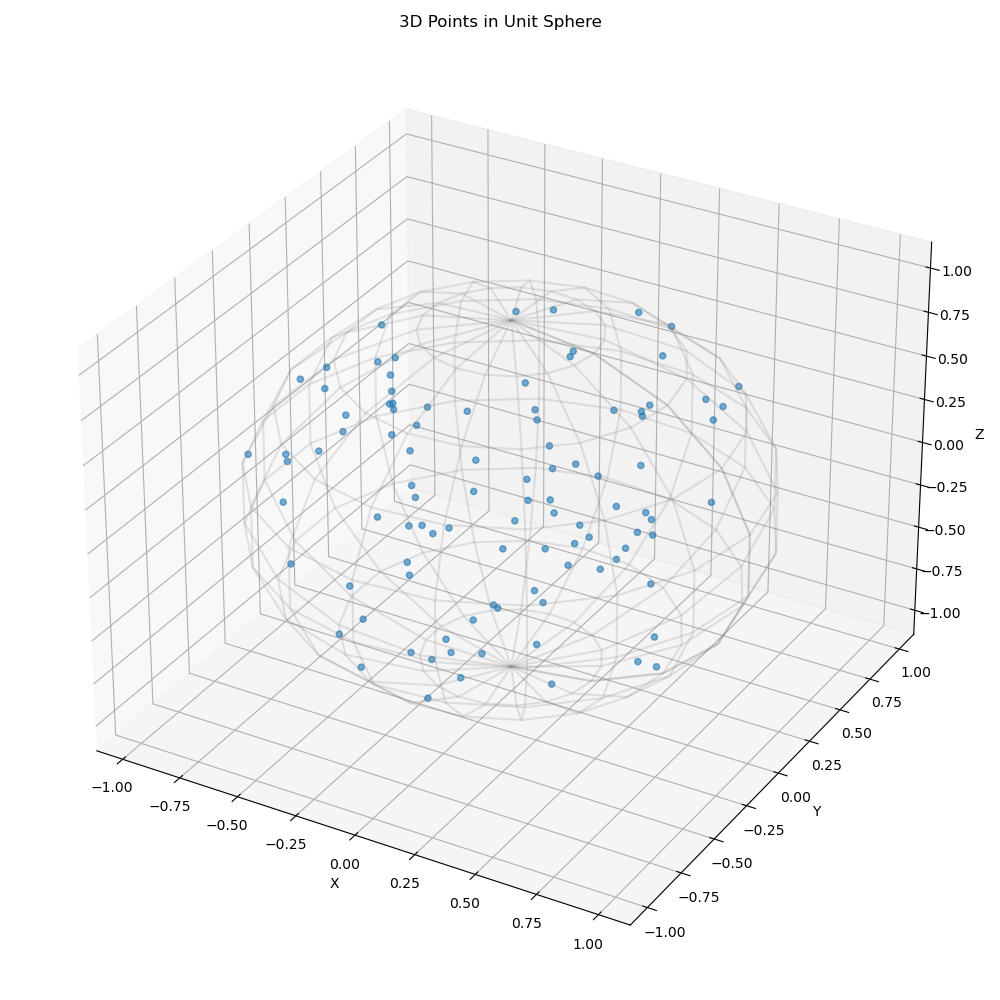

In [6]:
plot_3d_distribution(generate_uniform_hypersphere_points(3, 100))

In [7]:
import numpy as np

def generate_positive_orthant_hypersphere_points(d, n):
    """
    Generate n points uniformly distributed on the portion of a d-dimensional 
    hypersphere surface where all coordinates are positive.
    
    Parameters:
    -----------
    d : int
        Number of dimensions
    n : int
        Number of points to generate in the positive orthant
    
    Returns:
    --------
    points : ndarray
        Array of shape (n, d) containing uniformly distributed points
    """
    # Since the positive orthant is 1/2^d of the hypersphere,
    # we need to use rejection sampling efficiently
    
    points = []
    total_generated = 0
    
    # We'll generate points in batches to improve efficiency
    batch_size = max(100, n * 2**d)  # Adjusted for dimensionality
    
    while len(points) < n:
        # Generate a batch of points on the full hypersphere
        candidates = np.random.normal(size=(batch_size, d))
        norms = np.linalg.norm(candidates, axis=1, keepdims=True)
        candidates = candidates / norms
        
        # Filter for points where all coordinates are positive
        mask = np.all(candidates > 0, axis=1)
        positive_points = candidates[mask]
        
        # Add the found positive points to our collection
        points.extend(positive_points)
        total_generated += batch_size
        
    # Trim to exactly n points
    points = np.array(points[:n])
    
    # Print efficiency statistics
    efficiency = (n / total_generated) * 100
    theoretical_efficiency = (1 / 2**d) * 100
    print(f"Generated {n} points in the positive orthant")
    print(f"Sampling efficiency: {efficiency:.2f}% (theoretical: {theoretical_efficiency:.2f}%)")
    
    return points

def generate_efficient_positive_orthant_points(d, n):
    """
    More efficient method to generate points in the positive orthant
    using a direct transformation approach
    
    Parameters:
    -----------
    d : int
        Number of dimensions
    n : int
        Number of points to generate in the positive orthant
    
    Returns:
    --------
    points : ndarray
        Array of shape (n, d) containing uniformly distributed points
    """
    # Generate points using the chi distribution for the positive orthant
    points = np.random.chisquare(df=1, size=(n, d))
    
    # Normalize to place on the unit hypersphere
    norms = np.linalg.norm(points, axis=1, keepdims=True)
    points = points / norms
    
    return points

def generate_stratified_positive_orthant_points(d, n):
    """
    Generate points in the positive orthant of a hypersphere using
    a stratified approach for better uniformity
    
    Parameters:
    -----------
    d : int
        Number of dimensions
    n : int
        Number of points to generate in the positive orthant
    
    Returns:
    --------
    points : ndarray
        Array of shape (n, d) containing uniformly distributed points
    """
    # First approach: Use square roots of uniform random variables
    # This generates points with a distribution appropriate for the positive orthant
    
    points = np.zeros((n, d))
    
    for i in range(n):
        # Generate d values from uniform distribution
        u = np.random.random(d)
        # Transform to appropriate distribution for positive orthant
        v = np.sqrt(u)
        # Normalize to unit length
        norm = np.linalg.norm(v)
        points[i] = v / norm
        
    return points

# Visual validation for 3D points
def plot_positive_orthant_sphere(points):
    """
    Visualize points on the positive orthant of a 3D sphere
    """
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the points
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=30)
    
    # Draw the 1/8th sphere wireframe (positive orthant)
    u = np.linspace(0, np.pi/2, 20)
    v = np.linspace(0, np.pi/2, 20)
    u, v = np.meshgrid(u, v)
    
    x = np.cos(u) * np.sin(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(v)
    
    ax.plot_surface(x, y, z, color='gray', alpha=0.1)
    
    # Set equal aspect ratio and limits
    ax.set_box_aspect([1, 1, 1])
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Points on Positive Orthant of Unit Sphere')
    
    return fig, ax

Generated 1000 points in the positive orthant
Sampling efficiency: 12.50% (theoretical: 12.50%)


(<Figure size 1000x1000 with 1 Axes>,
 <Axes3DSubplot:title={'center':'Points on Positive Orthant of Unit Sphere'}, xlabel='X', ylabel='Y'>)

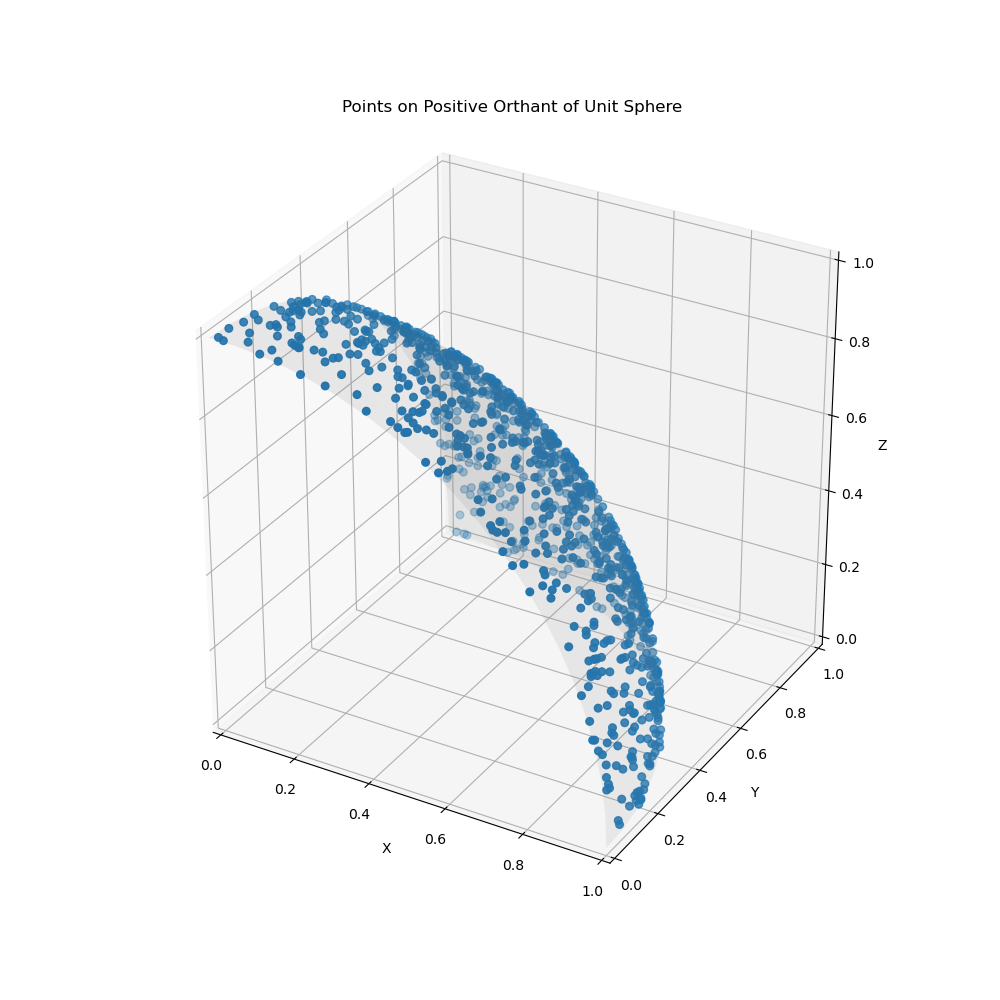

In [15]:
plot_positive_orthant_sphere(generate_positive_orthant_hypersphere_points(3, 1000))